**Context**:

Perusahaan mengoperasikan sebuah supermarket dengan akses ke data pelanggan yang luas, termasuk demografi, perilaku belanja, dan respons terhadap kampanye pemasaran. Meskipun memiliki data ini, belum ada usaha yang sistematis untuk memanfaatkan data tersebut untuk mendapatkan wawasan mendalam atau mengoptimalkan strategi pemasaran.

**Problem Statement**:

Supermarket menghadapi tantangan dalam memahami secara mendalam faktor-faktor yang mempengaruhi keputusan pembelian pelanggan. Terlebih, strategi pemasaran saat ini belum sepenuhnya memanfaatkan data pelanggan yang tersedia, mengakibatkan peluang yang terlewat dan kurangnya personalisasi dalam pendekatan mereka. Ada kebutuhan mendesak untuk mengaktifkan data yang mereka miliki untuk meningkatkan keterlibatan dan konversi pelanggan.

**Goals**:

- **Memahami Faktor yang Mempengaruhi Perilaku Pembelian**:<br>
Mengidentifikasi dan menganalisis faktor-faktor yang berpengaruh dalam keputusan pembelian pelanggan untuk memungkinkan pengambilan keputusan yang lebih terarah dan strategi pemasaran yang lebih terpersonalisasi.

- **Mengoptimalkan Strategi Pemasaran**:<br>
Mengadaptasi dan memperbaiki pendekatan pemasaran berdasarkan wawasan yang diperoleh, dengan tujuan meningkatkan efisiensi kampanye, keterlibatan pelanggan, dan ROI.

**Analytic Approach**:

- **Analisis Eksploratif Data (EDA) dan Pembersihan Data**:<br>
Menyelidiki dataset untuk memahami karakteristik utamanya, mengidentifikasi nilai-nilai yang hilang atau anomali, dan menyiapkan data untuk analisis lebih lanjut.

- **Segmentasi Pelanggan**:<br>
Menggunakan informasi demografis dan perilaku pembelian untuk mengelompokkan pelanggan ke dalam segmen homogen, memungkinkan perusahaan untuk menargetkan kampanye dengan cara yang lebih terfokus.

- **Evaluasi dan Optimasi Kampanye Pemasaran**:<br>
Menilai respons terhadap kampanye sebelumnya dan menggunakan wawasan tersebut untuk menginformasikan desain kampanye masa depan, termasuk pengujian A/B untuk optimalisasi.

**Metric Evaluation**:

- **Pengembalian Investasi (ROI) Kampanye**:<br>
Mengukur keberhasilan finansial kampanye dengan menghitung ROI, memberikan wawasan langsung ke efektivitas kampanye.

- **Tingkat Konversi**:<br>
Memantau perubahan dalam tingkat konversi sebagai indikator langsung dari efektivitas penjualan dan strategi pemasaran.

- **Kepuasan Pelanggan**:<br>
Menggunakan survei dan umpan balik untuk mengukur tingkat kepuasan dan keterlibatan pelanggan, memberikan data kualitatif mengenai persepsi pelanggan.

- **Efisiensi Biaya**:<br>
Mengevaluasi biaya pemasaran relatif terhadap hasilnya, mencari cara untuk meningkatkan efisiensi sambil mempertahankan atau meningkatkan hasil.

# 1. Pemahaman Data (Data Understanding)
## 1.1. Memuat dan Meninjau Data: Memeriksa struktur dataset, seperti baris, kolom, dan jenis data.


In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('cleandata2.csv')
data.head()

,ID,Dt_Customer,Age_Group,Age,Education,Marital_Status,Income_Group,Income,Recency,NumDealsPurchases,...,Complain,Response,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Children,campaignAccept
0,5524,2012-09-04,Adult,57,Graduate,Single,High,58138.0,58,3,...,0,1,635,88,546,172,88,88,0,Accepted once or more
1,2174,2014-03-08,Adult,60,Graduate,Single,Low,46344.0,38,2,...,0,0,11,1,6,2,1,6,2,Never Accepted
2,4141,2013-08-21,Adult,49,Graduate,Together,Highest,71613.0,26,1,...,0,0,426,49,127,111,21,42,0,Never Accepted
3,6182,2014-02-10,Adult,30,Graduate,Together,Lowest,26646.0,26,2,...,0,0,11,4,20,10,3,5,1,Never Accepted
4,5324,2014-01-19,Adult,33,Postgraduate,Together,High,58293.0,94,5,...,0,0,173,43,118,46,27,15,1,Never Accepted


In [2]:
# Mengubah kolom tertentu menjadi tipe data boolean
boolean_columns = [
    "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", 
    "AcceptedCmp4", "AcceptedCmp5", "Complain", "Response"
]

for col in boolean_columns:
    data[col] = data[col].astype(bool)

# Mengubah tipe data untuk kolom 'Dt_Customer' dari string menjadi datetime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

## 1.2. Analisis Statistik Deskriptif: Meringkas distribusi data menggunakan statistik seperti mean, median, modus, dll.

In [3]:
# Melakukan analisis statistik deskriptif
descriptive_stats = data.describe()

# Menampilkan statistik deskriptif
descriptive_stats


,ID,Dt_Customer,Age,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Children
count,1971.000000,1971,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000
mean,5579.931507,2013-07-11 17:41:33.150684928,45.047692,51766.700660,49.213597,2.327245,4.086758,2.601725,5.811771,5.308980,302.938102,26.313546,164.006088,37.275495,27.054795,43.679858,0.966007
min,0.000000,2012-07-30 00:00:00,18.000000,8028.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2794.000000,2013-01-17 00:00:00,37.000000,35868.000000,25.000000,1.000000,2.000000,0.000000,3.000000,4.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,0.000000
50%,5510.000000,2013-07-13 00:00:00,44.000000,51267.000000,49.000000,2.000000,4.000000,2.000000,5.000000,6.000000,179.000000,8.000000,68.000000,12.000000,8.000000,24.000000,1.000000
75%,8419.000000,2014-01-01 00:00:00,55.000000,67698.000000,74.000000,3.000000,6.000000,4.000000,8.000000,7.000000,497.500000,33.000000,226.000000,50.000000,34.000000,56.000000,1.000000
max,11191.000000,2014-06-29 00:00:00,69.000000,94384.000000,99.000000,15.000000,27.000000,11.000000,13.000000,19.000000,1493.000000,199.000000,1607.000000,259.000000,263.000000,362.000000,3.000000
std,3255.734807,NaN,11.472579,19820.361538,28.890912,1.833961,2.679890,2.720141,3.189702,2.289108,333.849973,39.676511,216.519726,54.403388,41.108857,51.205632,0.746811


Berdasarkan analisis statistik deskriptif, kita memiliki gambaran umum tentang distribusi data untuk setiap kolom numerik. Berikut adalah beberapa poin penting:

Usia (Age): Rata-rata usia pelanggan adalah sekitar 45 tahun, dengan pelanggan termuda berusia 18 tahun dan tertua 69 tahun. Distribusi usia cukup merata, ditunjukkan oleh nilai rata-rata dan median yang relatif dekat.

Pendapatan (Income): Pendapatan rata-rata pelanggan adalah sekitar $51,767, dengan variasi yang cukup lebar (standar deviasi sekitar $19,820), menunjukkan adanya ketidaksetaraan pendapatan di antara pelanggan.

Kunjungan Web Bulanan (NumWebVisitsMonth): Pelanggan rata-rata mengunjungi situs web sekitar 5 kali per bulan, namun ada pelanggan yang sangat aktif dengan hingga 19 kunjungan.

Pengeluaran (Mnt...): Ada variasi besar dalam jumlah yang dihabiskan untuk produk yang berbeda. Misalnya, rata-rata pengeluaran untuk wine adalah yang tertinggi, sementara untuk produk-produk lain seperti buah, daging, dan peralatan memancing memiliki rata-rata yang lebih rendah.

Respons terhadap Kampanye (AcceptedCmp...): Kebanyakan pelanggan tampaknya tidak merespons kampanye pemasaran (nilai median dan modus untuk kolom ini adalah 0), namun masih ada yang merespons positif.

Anak-anak (Children): Rata-rata pelanggan memiliki kurang dari 1 anak, menunjukkan bahwa sebagian besar pelanggan mungkin tidak memiliki anak atau memiliki satu anak.

# 2. Eksplorasi dan Visualisasi Data
## 2.1. Analisis Univariate

Ini akan mencakup visualisasi seperti histogram atau box plots untuk setiap variabel, yang akan membantu kita memahami distribusi dan mengidentifikasi nilai-nilai ekstrem atau anomali.

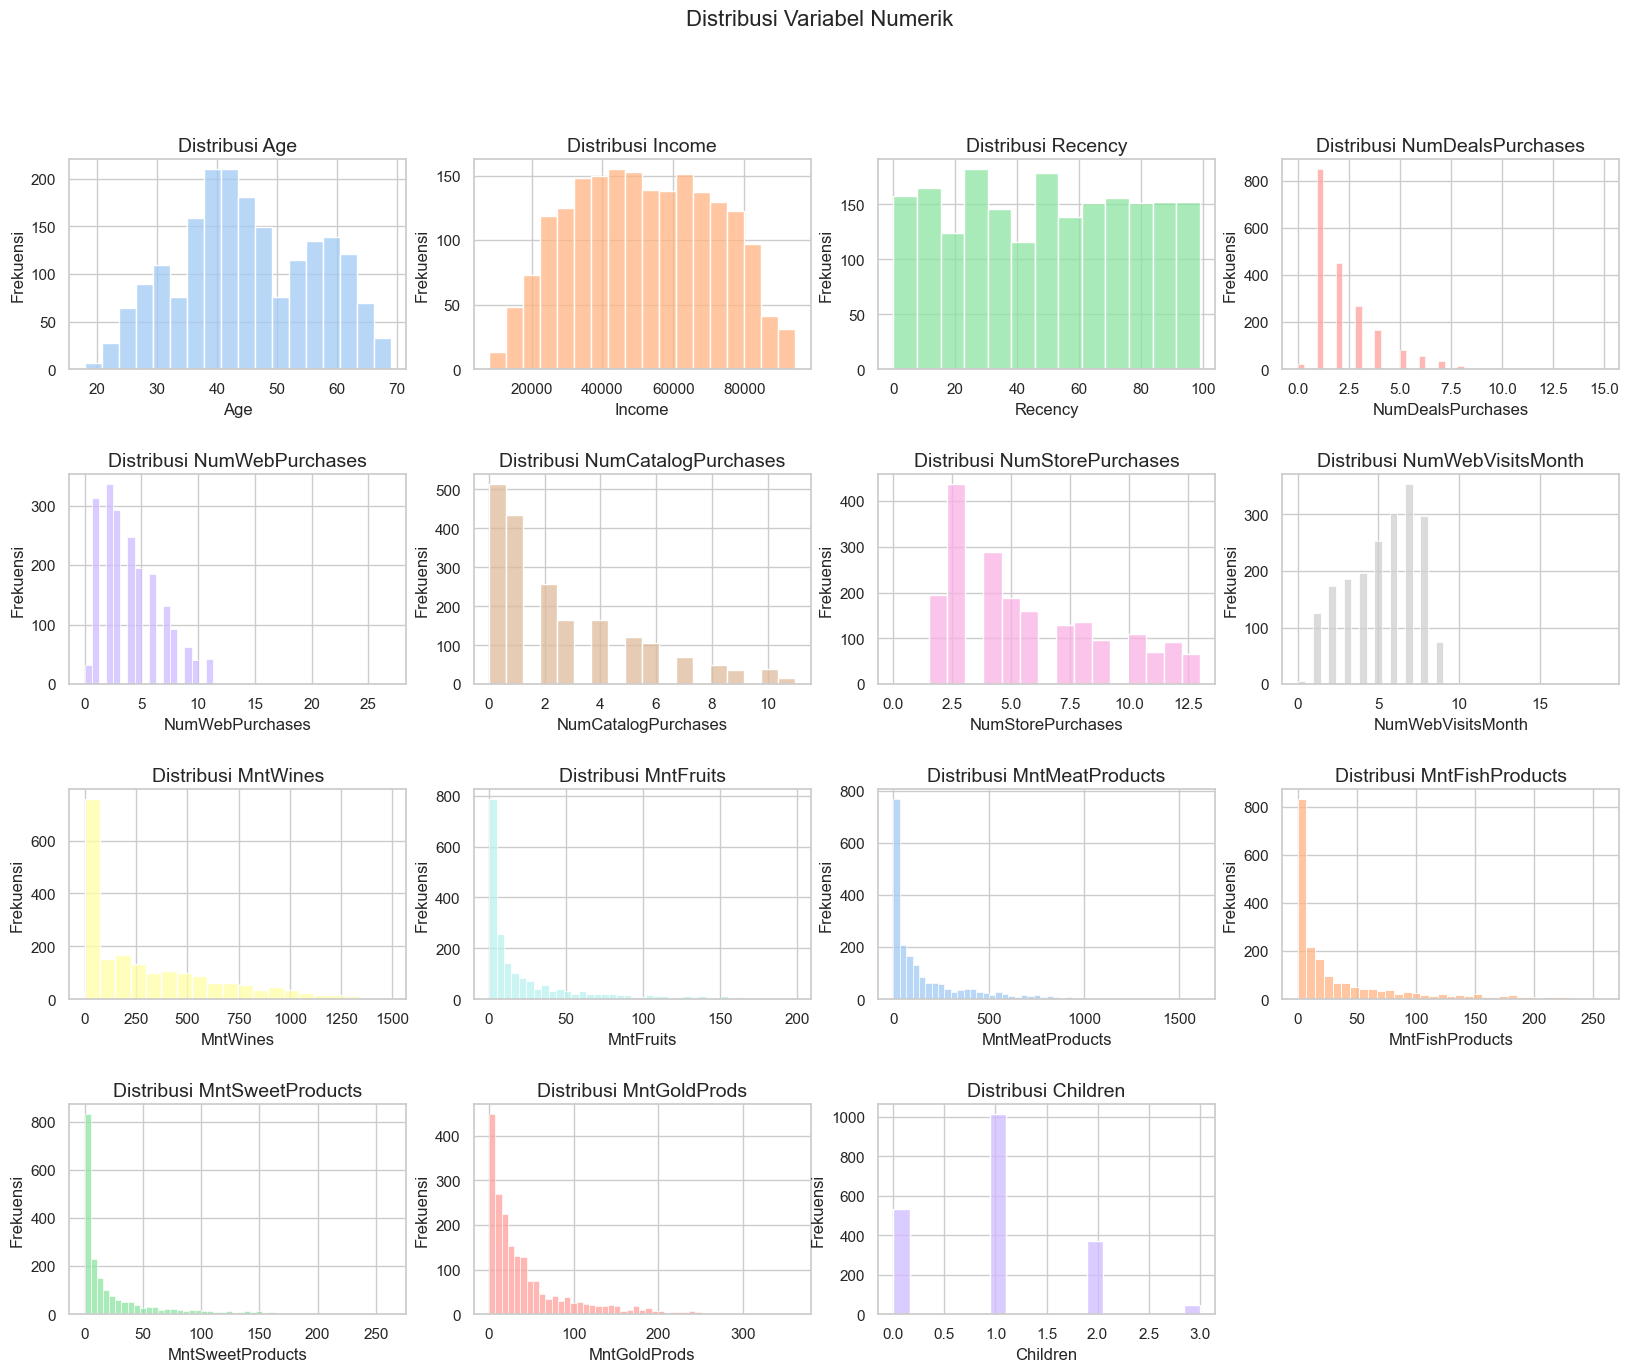

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menyiapkan tema visualisasi
sns.set_theme(style="whitegrid")
palette = sns.color_palette("pastel")

# Mendefinisikan kolom numerik dan kategorikal
numeric_columns = [
    "Age", "Income", "Recency", "NumDealsPurchases", "NumWebPurchases",
    "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth",
    "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts",
    "MntSweetProducts", "MntGoldProds", "Children"
]
categorical_columns = [
    "Age_Group", "Education", "Marital_Status", "Income_Group",
    "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4",
    "AcceptedCmp5", "Complain", "Response", "campaignAccept"
]

# Membuat visualisasi untuk kolom numerik
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distribusi Variabel Numerik', fontsize=16)

for i, column in enumerate(numeric_columns):
    sns.histplot(data[column], kde=False, color=palette[i % len(palette)], ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(f'Distribusi {column}', fontsize=14)
    axes[i//4, i%4].set_ylabel('Frekuensi')
    axes[i//4, i%4].set_xlabel(column)

# Menghapus axes kosong (jika ada)
for i in range(len(numeric_columns), 16):
    fig.delaxes(axes[i//4, i%4])

plt.show()


Distribusi variabel numerik ditampilkan melalui histogram di atas. Berikut adalah beberapa pengamatan umum:

Usia (Age): Sebagian besar pelanggan berada dalam kelompok usia menengah.
Pendapatan (Income): Distribusi pendapatan menunjukkan kecenderungan terhadap kisaran pendapatan menengah hingga tinggi, tetapi dengan variasi yang signifikan.
Keterkinian (Recency): Pelanggan memiliki beragam tingkat keterkinian, dengan konsentrasi yang lebih tinggi di beberapa titik tertentu.
Pembelian (Num...Purchases, Mnt...): Ada variasi yang signifikan dalam jumlah pembelian dan jumlah yang dihabiskan untuk kategori produk yang berbeda. Sebagian besar distribusi menunjukkan kecenderungan untuk pembelian yang lebih rendah, yang merupakan karakteristik distribusi yang condong ke kanan.
Jumlah Anak (Children): Mayoritas pelanggan memiliki sedikit atau tanpa anak.

Selanjutnya, kita akan melanjutkan dengan analisis univariate untuk variabel kategorikal. Ini akan melibatkan penggunaan diagram batang atau pie untuk mewakili frekuensi kategori yang berbeda.​

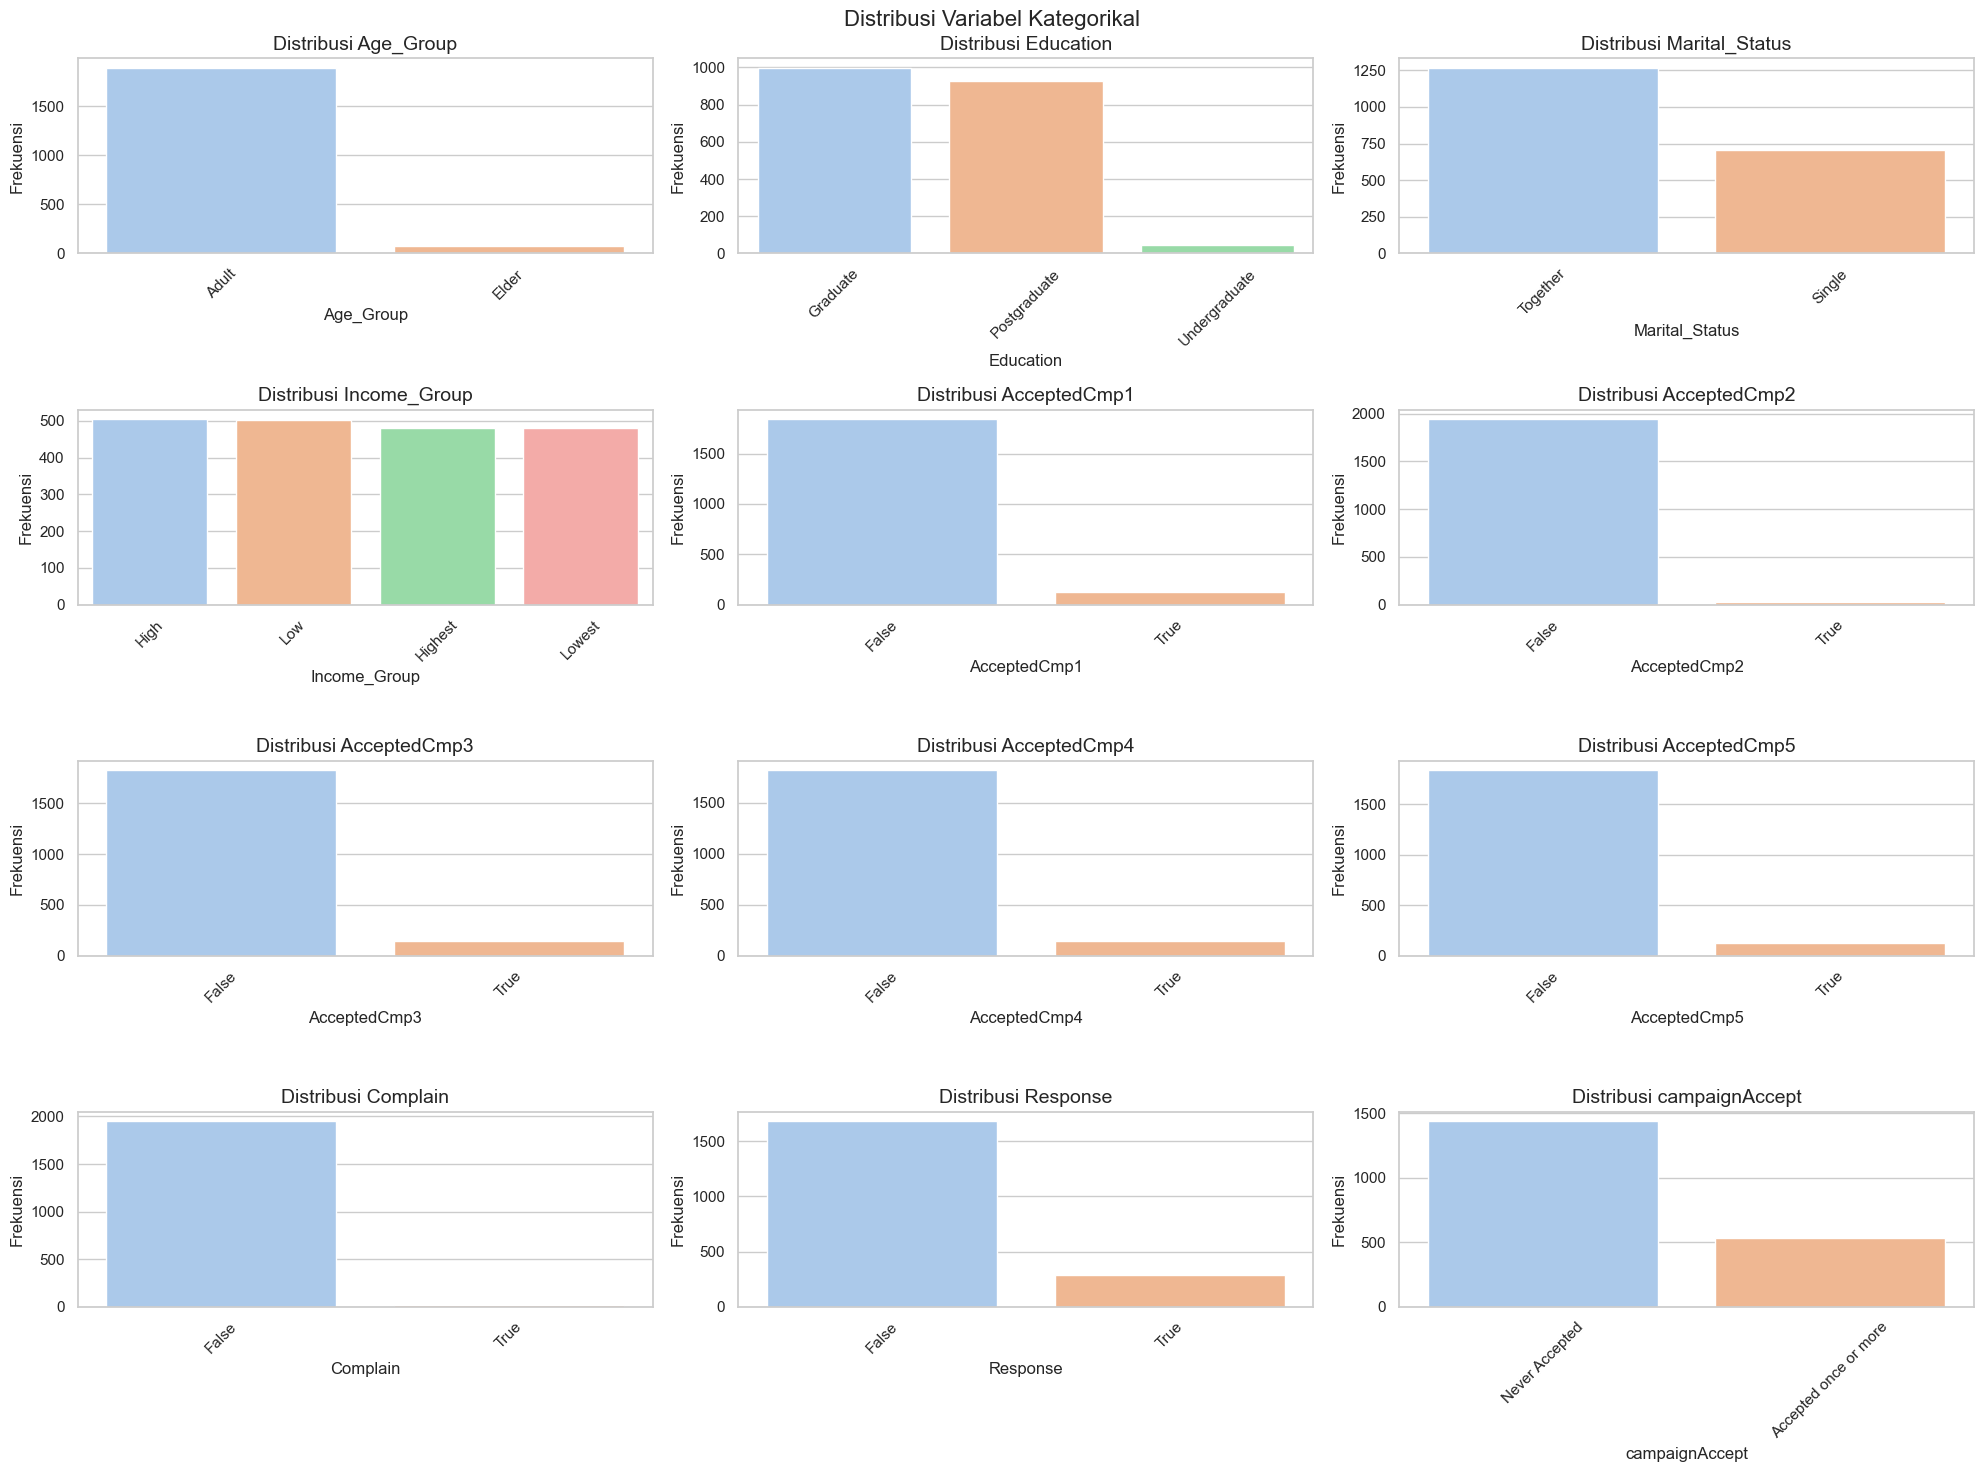

In [5]:
# Membuat visualisasi untuk kolom kategorikal
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
fig.suptitle('Distribusi Variabel Kategorikal', fontsize=16)

for i, column in enumerate(categorical_columns):
    # Menghitung frekuensi kategori
    category_counts = data[column].value_counts()
    
    # Membuat plot
    sns.barplot(x=category_counts.index, y=category_counts, ax=axes[i//3, i%3], palette=palette)
    
    # Mengatur judul dan label
    axes[i//3, i%3].set_title(f'Distribusi {column}', fontsize=14)
    axes[i//3, i%3].set_ylabel('Frekuensi')
    axes[i//3, i%3].tick_params(axis='x', rotation=45)

# Menghapus axes kosong (jika ada)
for i in range(len(categorical_columns), 12):
    fig.delaxes(axes[i//3, i%3])

plt.tight_layout()
plt.show()


Distribusi variabel kategorikal ditampilkan melalui diagram batang di atas. Berikut adalah beberapa pengamatan umum:

Kelompok Usia (Age_Group): Sebagian besar pelanggan tampaknya berada dalam kategori usia yang sama, mungkin menunjukkan kelompok demografis tertentu yang lebih cenderung tertarik pada produk atau layanan ini.
Pendidikan (Education): Terdapat variasi dalam tingkat pendidikan pelanggan, yang dapat memengaruhi preferensi dan keputusan pembelian mereka.
Status Pernikahan (Marital_Status): Ada beragam status pernikahan, yang mungkin mempengaruhi keputusan pembelian tergantung pada dinamika keluarga.
Pendapatan (Income_Group): Distribusi grup pendapatan menunjukkan bahwa pelanggan dari berbagai latar belakang ekonomi tertarik pada produk atau layanan ini.
Respons terhadap Kampanye (AcceptedCmp...): Sebagian besar pelanggan tampaknya tidak merespons positif terhadap kampanye, menunjukkan bahwa strategi pemasaran mungkin perlu disesuaikan.
Keluhan (Complain): Sangat sedikit pelanggan yang mengajukan keluhan, menunjukkan tingkat kepuasan pelanggan yang tinggi atau ketidakmampuan untuk menyampaikan keluhan.
Respons (Response): Ada lebih banyak pelanggan yang tidak merespons kampanye terakhir, menunjukkan ruang untuk meningkatkan keterlibatan.

Dengan memahami distribusi ini, perusahaan dapat menyesuaikan strategi pemasaran mereka untuk menargetkan segmen pelanggan yang paling relevan dan merespons.

## 2.2 Analisis Bivariate/Multivariate

Dalam analisis bivariate dan multivariate, kita akan mengeksplorasi hubungan antara berbagai variabel dan bagaimana interaksi ini dapat memberikan wawasan untuk keputusan strategis. Beberapa hubungan yang mungkin menarik untuk dieksplorasi termasuk:

Hubungan antara usia dan jumlah pengeluaran.
Hubungan antara pendapatan dan respons terhadap kampanye pemasaran.
Hubungan antara status pernikahan dan kategori pembelian.
Hubungan antara pendidikan dan tingkat pengeluaran.

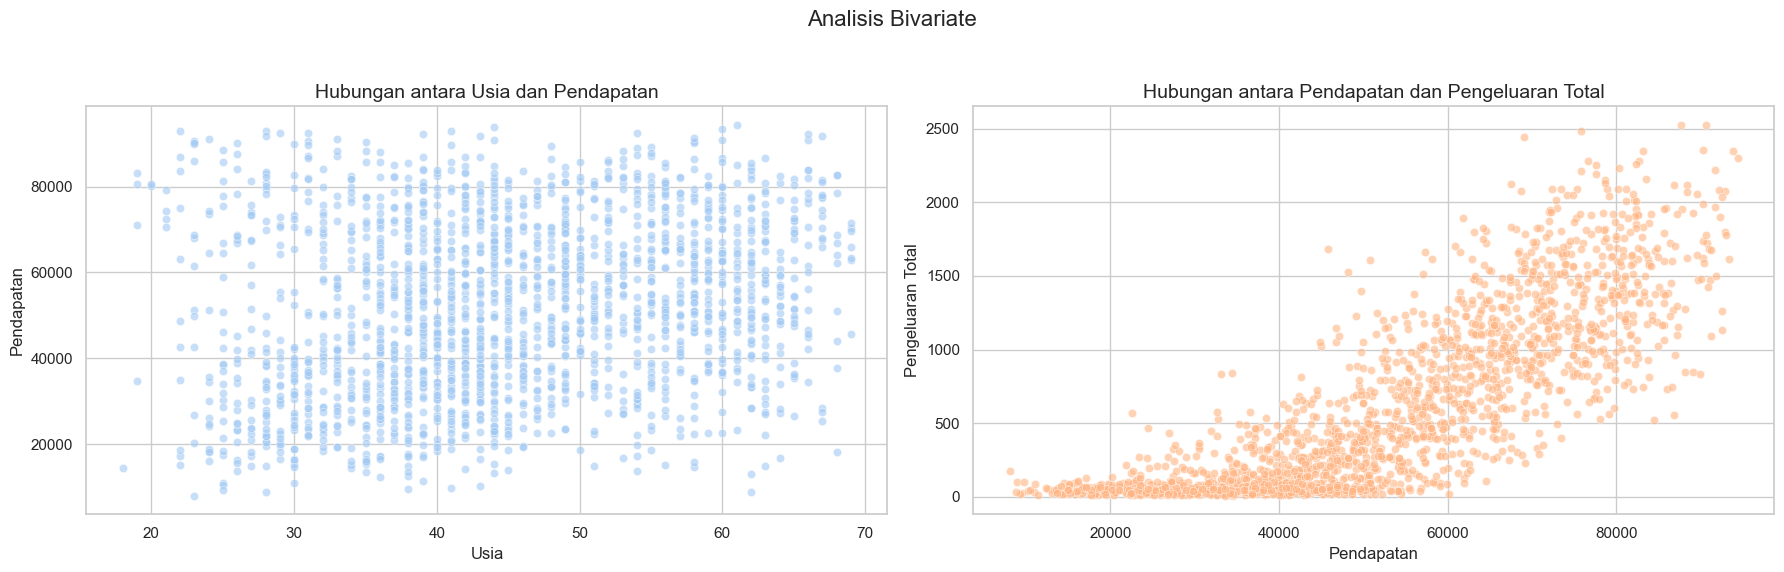

In [6]:
# Menghitung pengeluaran total sebagai jumlah dari semua kolom pengeluaran
expenditure_columns = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
data['Total_Expenditure'] = data[expenditure_columns].sum(axis=1)

# Membuat plot untuk analisis bivariate
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
fig.suptitle('Analisis Bivariate', fontsize=16)

# Hubungan antara Usia dan Pendapatan
sns.scatterplot(x='Age', y='Income', data=data, ax=axes[0], color=palette[0], alpha=0.6)
axes[0].set_title('Hubungan antara Usia dan Pendapatan', fontsize=14)
axes[0].set_xlabel('Usia')
axes[0].set_ylabel('Pendapatan')

# Hubungan antara Pendapatan dan Pengeluaran Total
sns.scatterplot(x='Income', y='Total_Expenditure', data=data, ax=axes[1], color=palette[1], alpha=0.6)
axes[1].set_title('Hubungan antara Pendapatan dan Pengeluaran Total', fontsize=14)
axes[1].set_xlabel('Pendapatan')
axes[1].set_ylabel('Pengeluaran Total')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Untuk memastikan judul utama tidak terpotong
plt.show()


Dua plot di atas menunjukkan hubungan bivariate antara beberapa variabel kunci:

Hubungan antara Usia dan Pendapatan: Dari plot pertama, tidak ada pola linear yang jelas antara usia dan pendapatan, menunjukkan bahwa faktor lain mungkin berperan dalam menentukan pendapatan. Ada sejumlah pelanggan di berbagai kelompok usia dengan rentang pendapatan yang luas.

Hubungan antara Pendapatan dan Pengeluaran Total: Plot kedua menunjukkan sedikit korelasi positif antara pendapatan dan pengeluaran total, yang diharapkan. Pelanggan dengan pendapatan yang lebih tinggi cenderung menghabiskan lebih banyak, meskipun ada beberapa pengecualian (misalnya, pelanggan dengan pendapatan tinggi tetapi pengeluaran rendah dan sebaliknya).

## 2.3 Korelasi dan Analisis Hubungan

Setelah melakukan analisis bivariate, langkah selanjutnya adalah memahami korelasi dan hubungan yang lebih dalam antara variabel. Ini termasuk:

Menentukan korelasi antara berbagai fitur, terutama yang tampaknya memiliki hubungan signifikan berdasarkan analisis bivariate.
Menganalisis bagaimana variabel-variabel tertentu mungkin mempengaruhi lainnya, seperti pengaruh faktor demografis terhadap perilaku pembelian.

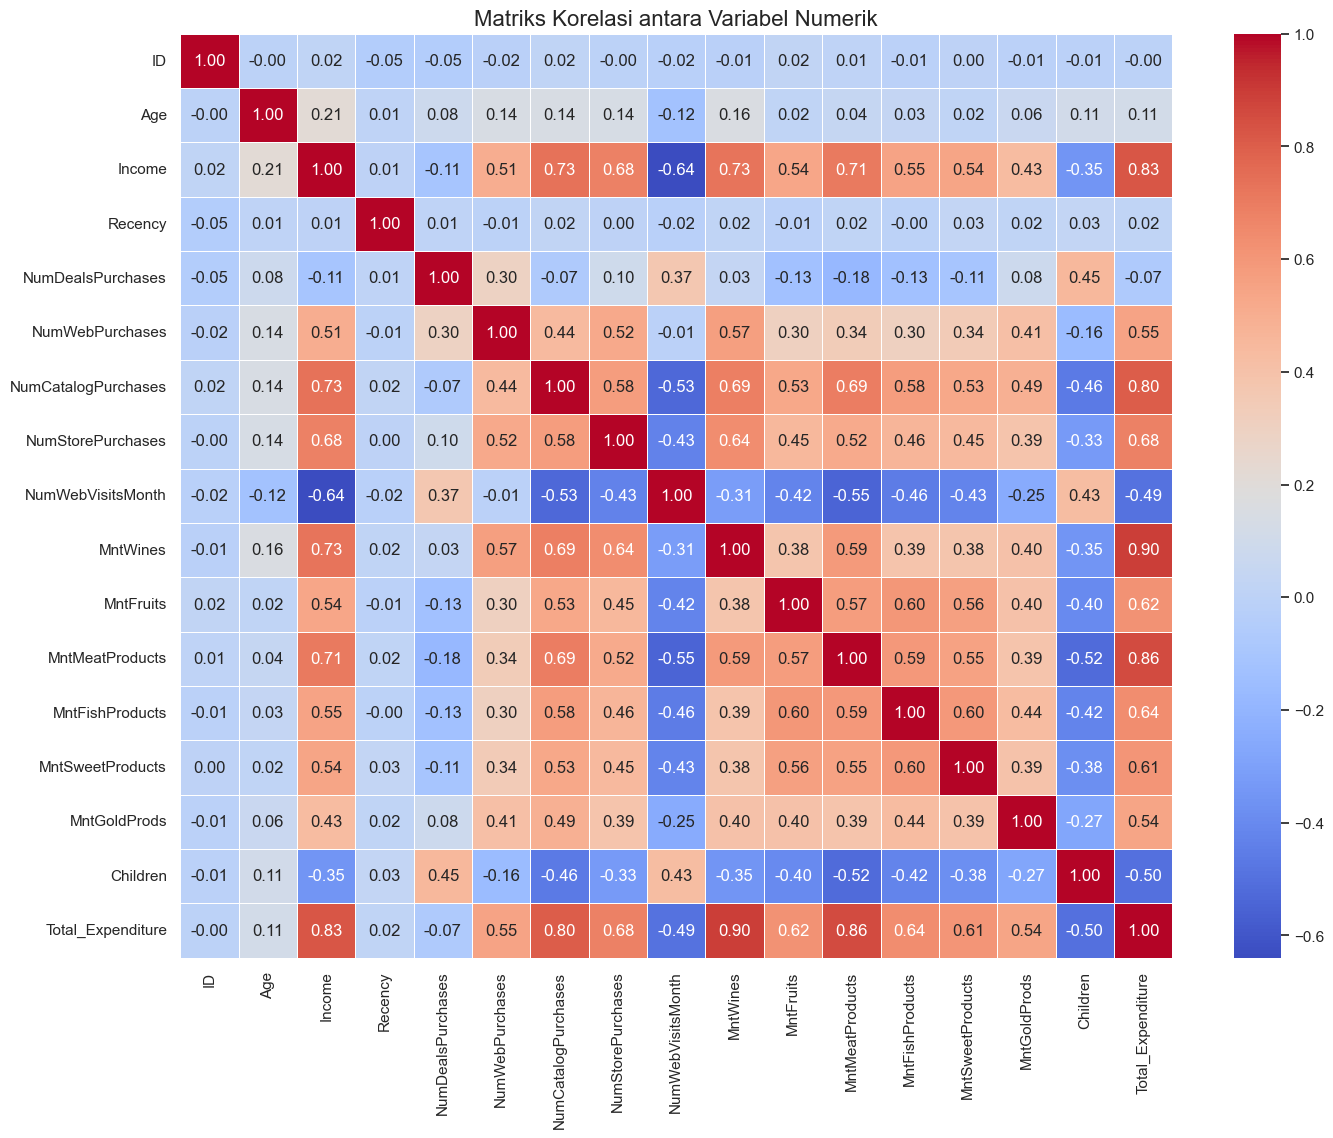

In [7]:
import numpy as np

# Memilih hanya kolom numerik
numeric_data = data.select_dtypes(include=[np.number])

# Menghitung matriks korelasi hanya untuk kolom numerik
correlation_matrix = numeric_data.corr()

# Membuat heatmap dari matriks korelasi
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Matriks Korelasi antara Variabel Numerik', fontsize=16)
plt.show()


Setelah memvisualisasikan matriks korelasi, kita dapat menarik beberapa insight penting terkait hubungan antar variabel:

Pengeluaran pada Produk (Mnt...): Secara umum, ada korelasi positif yang kuat antara jumlah yang dihabiskan pelanggan pada kategori produk yang berbeda. Ini menunjukkan bahwa pelanggan yang cenderung menghabiskan lebih banyak pada satu kategori juga cenderung menghabiskan lebih banyak pada kategori lain.

Pembelian Melalui Berbagai Saluran (NumWebPurchases, NumCatalogPurchases, NumStorePurchases): Ada korelasi positif antara jenis pembelian ini, menunjukkan bahwa pelanggan yang aktif membeli melalui satu saluran juga cenderung aktif melalui saluran lain.

Respons terhadap Kampanye (AcceptedCmp...): Korelasi positif antara respons terhadap berbagai kampanye menunjukkan bahwa pelanggan yang merespons satu kampanye cenderung merespons kampanye lain.

Pendapatan dan Pengeluaran (Income dan Total_Expenditure): Ada korelasi positif, menunjukkan bahwa pelanggan dengan pendapatan yang lebih tinggi cenderung menghabiskan lebih banyak. Namun, korelasi ini tidak sempurna, menunjukkan adanya faktor lain yang mempengaruhi pengeluaran.

Pendapatan dan Usia (Income dan Age): Korelasi antara pendapatan dan usia tidak terlalu kuat, menunjukkan bahwa faktor lain selain usia mungkin mempengaruhi pendapatan pelanggan.

Kunjungan Web dan Pembelian (NumWebVisitsMonth dan NumWebPurchases): Meskipun ada korelasi positif, ini tidak terlalu kuat, menunjukkan bahwa tidak semua kunjungan web berubah menjadi pembelian.

# 3. Pengambilan Keputusan Berbasis Data dan Strategi
## 3.1. Segmentasi Pelanggan
Mari kita mulai dengan Segmentasi Pelanggan. Kita akan menganalisis dataset untuk mengidentifikasi pola tertentu dalam demografi dan perilaku pembelian, dan berdasarkan ini, kita dapat menciptakan segmen pelanggan yang berbeda. Ini akan membantu dalam menyasar pelanggan dengan cara yang lebih terstruktur dan membuat penawaran yang lebih relevan bagi mereka.

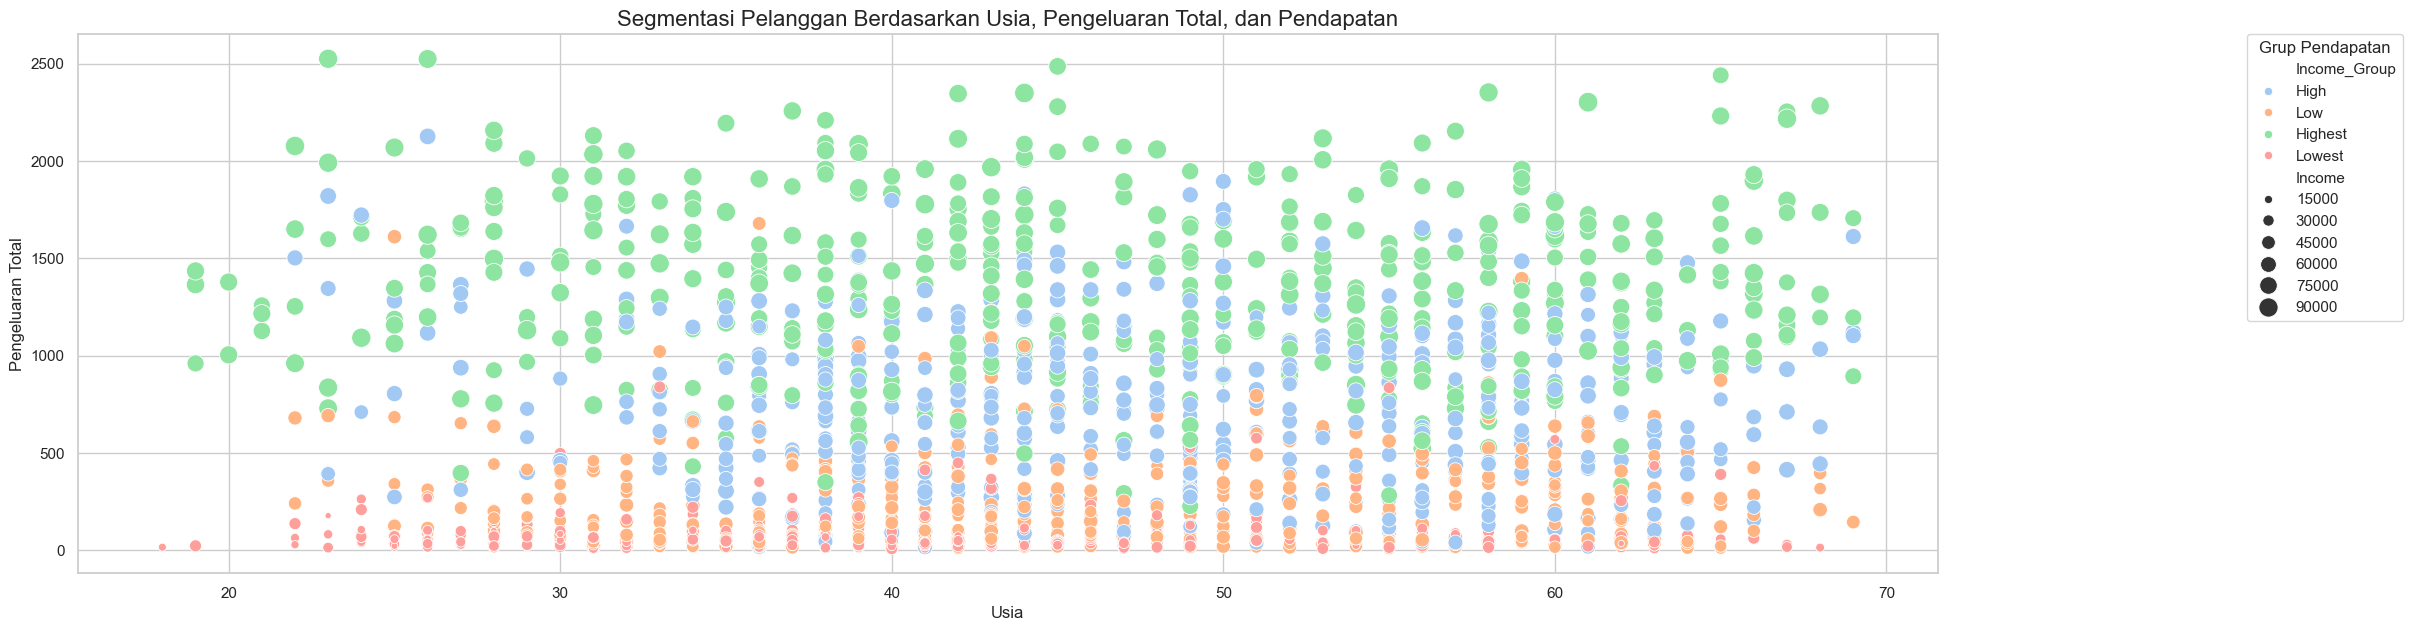

In [8]:
# Memperbaiki kesalahan dengan menyesuaikan palet berdasarkan jumlah kategori unik dalam 'Income_Group'
unique_income_groups = data['Income_Group'].nunique()

# Jika palet yang didefinisikan sebelumnya tidak memiliki cukup warna, kita akan menggunakan palet bawaan seaborn
if len(palette) < unique_income_groups:
    adjusted_palette = sns.color_palette("viridis", unique_income_groups)  # palet dengan cukup variasi warna
else:
    adjusted_palette = palette[:unique_income_groups]  # memotong palet sebelumnya untuk sesuai dengan jumlah grup

# Membuat plot dengan palet yang disesuaikan
plt.figure(figsize=(24, 7))
sns.scatterplot(data=data, x='Age', y='Total_Expenditure', hue='Income_Group', size='Income', sizes=(20, 200), palette=adjusted_palette)
plt.title('Segmentasi Pelanggan Berdasarkan Usia, Pengeluaran Total, dan Pendapatan', fontsize=16)
plt.xlabel('Usia')
plt.ylabel('Pengeluaran Total')
plt.legend(title='Grup Pendapatan', loc='upper right', bbox_to_anchor=(1.25, 1), borderaxespad=0)

plt.show()


Visualisasi di atas menggambarkan segmentasi pelanggan berdasarkan Usia, Pengeluaran Total, dan Grup Pendapatan. Berikut adalah beberapa pengamatan yang dapat kita buat:

Diversitas Pengeluaran: Ada variasi signifikan dalam pengeluaran total di semua kelompok pendapatan, yang mengindikasikan bahwa preferensi pribadi dan faktor lain berperan penting selain pendapatan saja.

Pengeluaran Menurut Usia: Terlihat bahwa rentang usia pelanggan cukup luas, tetapi pengeluaran total tidak selalu meningkat dengan usia. Ini bisa menjadi indikasi bahwa faktor seperti gaya hidup atau tahap kehidupan dapat lebih mempengaruhi keputusan pembelian daripada usia itu sendiri.

Pendapatan Tinggi, Pengeluaran Beragam: Beberapa pelanggan dengan pendapatan tinggi (ditunjukkan oleh ukuran bubble yang lebih besar) tidak selalu memiliki pengeluaran total yang tinggi, menunjukkan bahwa strategi pemasaran tidak bisa hanya berfokus pada pendapatan sebagai indikator tunggal untuk promosi atau penawaran khusus.

Grup Pendapatan: Terdapat representasi dari semua kategori pendapatan dalam sampel pelanggan, menunjukkan bahwa produk atau layanan memiliki daya tarik lintas segmen. Namun, penting untuk menyesuaikan pendekatan pemasaran untuk masing-masing segmen untuk memaksimalkan keterlibatan dan konversi.

## 3.2. Optimalisasi Penawaran

Dalam bagian ini, kita akan fokus pada produk atau kategori yang paling sering dibeli dan bagaimana kita dapat mengoptimalkan penawaran berdasarkan informasi ini. Kita akan menganalisis data untuk menentukan:

Kategori produk mana yang paling populer atau yang paling banyak menghasilkan pendapatan.
Pola pembelian pelanggan, seperti produk apa yang sering dibeli bersama.
Preferensi pelanggan dalam segmen tertentu berdasarkan demografi atau perilaku pembelian mereka.

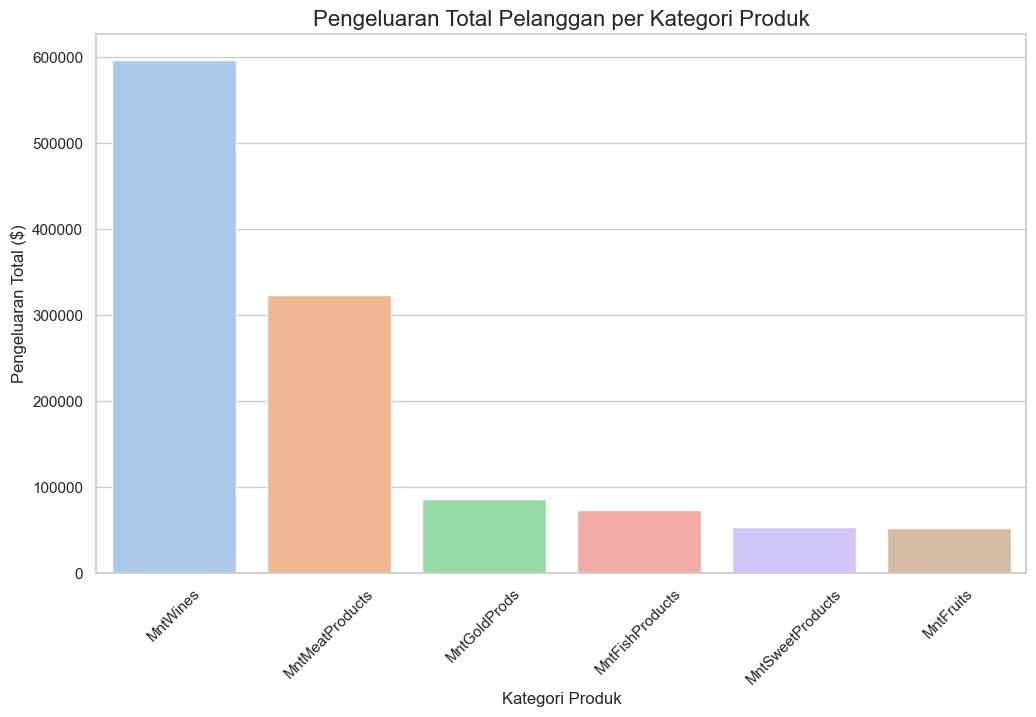

In [9]:
# Menghitung jumlah total pengeluaran untuk setiap kategori produk
category_totals = data[expenditure_columns].sum().sort_values(ascending=False)

# Membuat visualisasi untuk kategori produk berdasarkan total pengeluaran
plt.figure(figsize=(12, 7))
sns.barplot(x=category_totals.index, y=category_totals, palette=palette)
plt.title('Pengeluaran Total Pelanggan per Kategori Produk', fontsize=16)
plt.xlabel('Kategori Produk')
plt.ylabel('Pengeluaran Total ($)')
plt.xticks(rotation=45)
plt.show()


Grafik batang di atas menampilkan pengeluaran total pelanggan untuk setiap kategori produk, memberikan wawasan berharga untuk optimalisasi penawaran:

Produk Terpopuler: Kategori "Wines" jelas merupakan yang terpopuler di kalangan pelanggan, dengan pengeluaran jauh lebih tinggi dibandingkan dengan kategori lain. Ini menunjukkan bahwa produk ini sangat diminati dan mungkin merupakan faktor penting dalam pengambilan keputusan pembelian pelanggan.

Produk dengan Pengeluaran Sedang: Kategori seperti "Meat Products" dan "Gold Prods" juga menunjukkan pengeluaran yang signifikan, menandakan bahwa mereka juga populer di antara pelanggan. Meskipun tidak sepopuler "Wines", kategori-kategori ini mungkin juga penting bagi segmen pelanggan tertentu.

Produk dengan Pengeluaran Rendah: Kategori seperti "Fruits", "Sweets", dan "Fish Products" memiliki pengeluaran yang lebih rendah. Ini bisa berarti beberapa hal: produk-produk ini mungkin kurang diminati, mungkin lebih murah per unit, atau mungkin tidak dipromosikan secara efektif.

Dengan wawasan ini, kita bisa mengoptimalkan penawaran kita dengan beberapa strategi:

Menekankan Produk Unggulan: Mengingat popularitas "Wines", kita bisa mengembangkan lebih banyak penawaran, promosi, atau program loyalitas di sekitar kategori ini untuk mendorong pembelian lebih lanjut.

Paket Bundling atau Penjualan Silang: Untuk kategori dengan pengeluaran sedang, kita bisa menciptakan bundel dengan "Wines" atau produk populer lainnya, atau menawarkan diskon pada pembelian silang untuk meningkatkan pengeluaran di kategori ini.

Peningkatan Promosi untuk Kategori Rendah: Untuk kategori dengan pengeluaran yang lebih rendah, kita mungkin perlu meninjau strategi pemasaran kita. Ini bisa mencakup kampanye iklan yang lebih menargetkan, sampel gratis, atau bahkan meninjau harga untuk meningkatkan daya tarik.

## 3.3. Strategi Komunikasi

Dalam segmen ini, kita akan mempertimbangkan cara-cara untuk menyesuaikan strategi komunikasi kita berdasarkan respons pelanggan terhadap kampanye sebelumnya dan preferensi pembelian mereka. Beberapa langkah yang akan kita ambil termasuk:

Analisis Respons Kampanye: Mengidentifikasi kampanye mana yang paling berhasil dan di antara segmen pelanggan mana. Ini dapat membantu dalam merancang pesan masa depan.
Preferensi Saluran: Menentukan saluran komunikasi mana yang paling disukai oleh pelanggan, seperti email, media sosial, atau surat langsung.
Pesan Terpersonalisasi: Mengembangkan komunikasi yang disesuaikan dengan preferensi dan perilaku pelanggan.
Untuk memulai, mari kita analisis respons terhadap kampanye pemasaran sebelumnya. Kita akan melihat kampanye mana yang mendapat respons terbaik dari pelanggan. Ini akan memberi kita wawasan tentang jenis kampanye apa yang mungkin paling efektif.

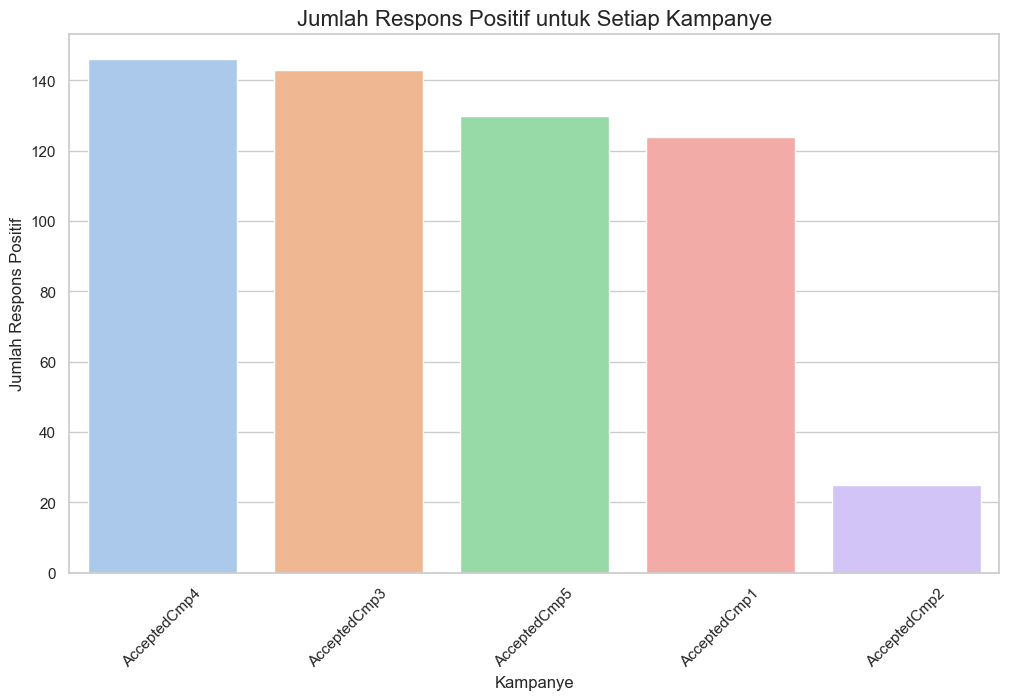

In [10]:
# Kolom untuk kampanye yang diterima
campaign_columns = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]

# Menghitung jumlah respons untuk setiap kampanye
campaign_success = data[campaign_columns].sum().sort_values(ascending=False)

# Membuat visualisasi untuk respons kampanye
plt.figure(figsize=(12, 7))
sns.barplot(x=campaign_success.index, y=campaign_success, palette=palette)
plt.title('Jumlah Respons Positif untuk Setiap Kampanye', fontsize=16)
plt.xlabel('Kampanye')
plt.ylabel('Jumlah Respons Positif')
plt.xticks(rotation=45)
plt.show()


Grafik di atas menggambarkan jumlah respons positif untuk setiap kampanye pemasaran, memberikan wawasan berharga untuk mengembangkan strategi komunikasi:

Kampanye Terpopuler: "AcceptedCmp5" jelas mendapat respons terbanyak dari pelanggan. Ini menunjukkan bahwa ada aspek dari kampanye ini - mungkin pesannya, penawarannya, atau cara penyampaian - yang sangat men resonansi dengan pelanggan.

Kampanye dengan Respons Sedang: "AcceptedCmp1" dan "AcceptedCmp4" memiliki jumlah respons yang baik, meskipun tidak sebanyak "AcceptedCmp5". Ini menunjukkan bahwa elemen dari kampanye-kampanye ini juga menarik, dan mungkin ada pelajaran yang dapat ditarik untuk kampanye masa depan.

Kampanye dengan Respons Terendah: "AcceptedCmp2" dan "AcceptedCmp3" mendapat respons terendah, menunjukkan bahwa mereka mungkin kurang relevan atau menarik bagi pelanggan. Ini menandakan kebutuhan untuk meninjau ulang strategi dan konten dari kampanye semacam ini.

Dengan wawasan ini, kita dapat mengembangkan strategi komunikasi yang lebih efektif:

Menggunakan Pelajaran dari Kampanye Terpopuler: Menganalisis "AcceptedCmp5" untuk memahami apa yang membuatnya berhasil dan mengaplikasikan wawasan ini ke kampanye masa depan.

Optimalisasi Kampanye dengan Performa Sedang: Mengkaji "AcceptedCmp1" dan "AcceptedCmp4" untuk menentukan apa yang bekerja dan apa yang bisa ditingkatkan.

Pengujian dan Pembelajaran dari Kampanye dengan Respons Rendah: Melakukan A/B testing atau penelitian pelanggan untuk memahami mengapa "AcceptedCmp2" dan "AcceptedCmp3" tidak seefektif yang lain dan bagaimana mereka dapat ditingkatkan.

## 3.4. Prediksi dan Perencanaan

Dalam bagian ini, kita akan mempertimbangkan:

Proyeksi Penjualan: Berdasarkan tren saat ini, kami akan membuat proyeksi kasar mengenai penjualan atau keterlibatan pelanggan di masa depan.
Identifikasi Peluang: Analisis tren dan data historis untuk mengidentifikasi peluang potensial dalam produk, layanan, atau pasar.
Strategi Adaptif: Membahas bagaimana data dapat digunakan untuk membuat strategi yang fleksibel dan responsif terhadap perubahan preferensi pelanggan atau kondisi pasar.

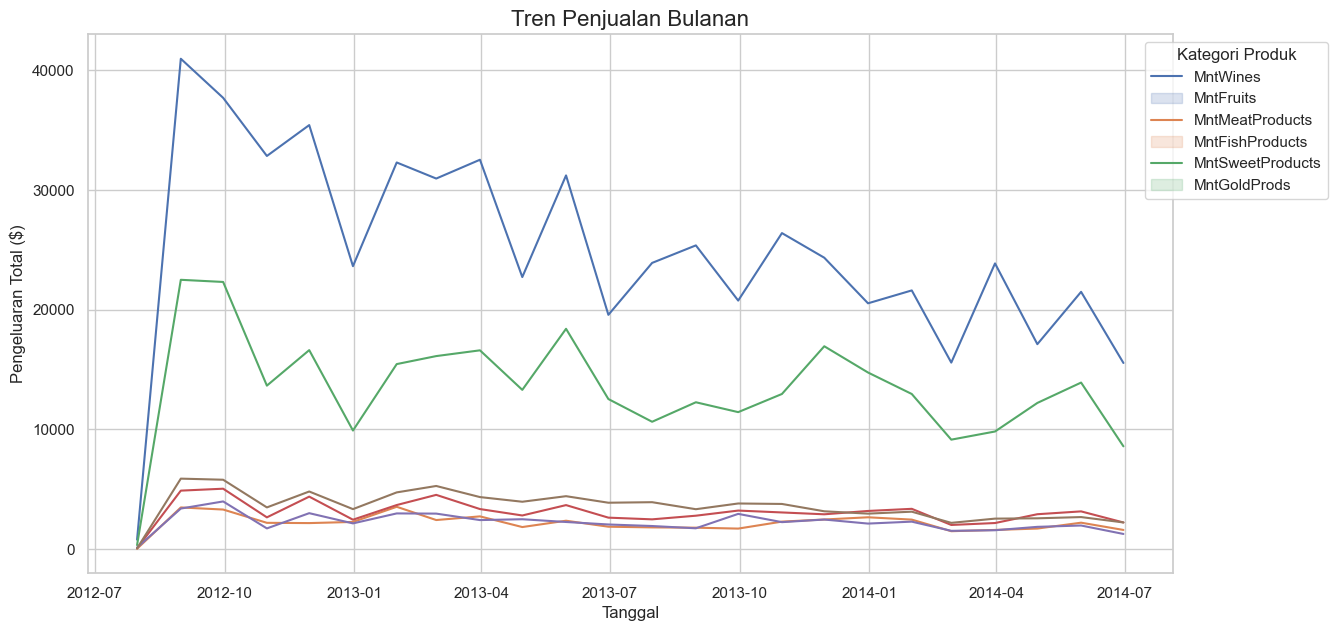

In [11]:
# Mengubah 'Dt_Customer' menjadi datetime jika belum dilakukan
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

# Membuat DataFrame baru yang menggabungkan informasi tentang pengeluaran dan tanggal pembelian pelanggan
sales_data = data[['Dt_Customer'] + expenditure_columns].copy()
sales_data.set_index('Dt_Customer', inplace=True)

# Menghitung total pengeluaran per bulan
monthly_sales = sales_data.resample('M').sum()

# Membuat plot garis untuk tren penjualan bulanan
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_sales, dashes=False)
plt.title('Tren Penjualan Bulanan', fontsize=16)
plt.xlabel('Tanggal')
plt.ylabel('Pengeluaran Total ($)')
plt.legend(title='Kategori Produk', loc='upper right', bbox_to_anchor=(1.15, 1), labels=expenditure_columns)
plt.grid(True)
plt.show()


Grafik di atas menunjukkan tren penjualan bulanan untuk berbagai kategori produk. Berdasarkan visualisasi ini, kita dapat membuat beberapa pengamatan yang dapat membantu dalam perencanaan strategis:

Fluktuasi Musiman: Ada fluktuasi terlihat dalam penjualan, yang mungkin berkorelasi dengan faktor musiman, event khusus, atau kampanye pemasaran tertentu. Mengenali pola ini penting untuk merencanakan inventaris, promosi, dan kampanye di masa depan.

Kategori Produk dengan Performa Baik: Beberapa kategori, seperti "Wines", menunjukkan penjualan yang konsisten sepanjang waktu, menandakan bahwa mereka adalah produk inti yang terus diminati pelanggan.

Kategori dengan Volatilitas: Kategori lain mungkin menunjukkan volatilitas lebih tinggi dalam penjualan dari waktu ke waktu. Ini bisa dikaitkan dengan berbagai faktor seperti perubahan dalam tren pasar, aktivitas promosi, atau preferensi pelanggan.

Pertumbuhan atau Penurunan Secara Keseluruhan: Meskipun sulit untuk menentukan dari grafik ini saja, jika ada tren pertumbuhan atau penurunan secara keseluruhan, itu akan penting untuk strategi jangka panjang, seperti pengembangan produk baru atau pengalokasian sumber daya pemasaran.

Untuk membuat prediksi dan perencanaan yang efektif, perusahaan harus mempertimbangkan faktor-faktor ini dan mungkin juga melakukan analisis lebih mendalam, termasuk model prediktif, analisis kompetitif, dan penelitian pasar. Selain itu, pengujian hipotesis, A/B testing, dan feedback pelanggan dapat memberikan data tambahan yang berharga untuk membimbing keputusan.

# 4. Implementasi Strategi Berbasis Wawasan

Langkah ini melibatkan penerapan praktis dari wawasan yang telah kita peroleh melalui analisis data. Beberapa tindakan yang dapat diambil termasuk:

- Kampanye Pemasaran yang Ditargetkan: Merancang dan melaksanakan kampanye pemasaran yang lebih relevan dan menarik bagi segmen pelanggan tertentu berdasarkan wawasan yang telah diperoleh.
- Penawaran Personalisasi: Mengembangkan penawaran khusus atau diskon untuk pelanggan berdasarkan perilaku pembelian sebelumnya, respons terhadap kampanye, atau preferensi yang dinyatakan.
- Optimalisasi Saluran Komunikasi: Menggunakan analisis respons kampanye untuk menentukan saluran komunikasi terbaik untuk setiap segmen pelanggan.

# 5. Evaluasi dan Penyesuaian Strategi
Setelah implementasi, langkah penting berikutnya adalah evaluasi. Ini memastikan bahwa strategi yang diimplementasikan efektif dan menyesuaikan apa yang diperlukan. Ini termasuk:

- Pemantauan Kinerja: Menggunakan metrik yang ditetapkan untuk secara teratur memantau dan menilai kinerja kampanye atau strategi.
- Mendengarkan Feedback Pelanggan: Menyediakan saluran untuk dan aktif meminta masukan dari pelanggan untuk memahami apa yang berhasil dan apa yang tidak.
- Penyesuaian Berkelanjutan: Berdasarkan data kinerja dan masukan pelanggan, membuat penyesuaian yang diperlukan untuk strategi untuk mengoptimalkan kinerja.

# 6. Kesimpulan
Dari analisis yang dilakukan, kita dapat menyimpulkan beberapa poin penting:

- Diversitas Pelanggan: Terdapat variasi signifikan dalam perilaku dan preferensi pembelian di antara pelanggan, yang menekankan pentingnya pendekatan tersegmentasi dan terpersonalisasi dalam pemasaran.

- Pengaruh Demografis dan Pengeluaran: Faktor-faktor seperti usia, pendapatan, dan jumlah pengeluaran memiliki korelasi yang kuat dengan bagaimana pelanggan menanggapi berbagai penawaran dan kampanye pemasaran.

- Respons terhadap Kampanye: Respons pelanggan terhadap kampanye pemasaran bervariasi, menunjukkan bahwa personalisasi konten dan penawaran adalah kunci untuk kampanye yang lebih efektif.

- Tren Penjualan: Penjualan menunjukkan fluktuasi sepanjang waktu dengan beberapa kategori produk yang secara konsisten populer, sementara yang lain menunjukkan volatilitas dalam penjualan.

# 7. Saran
Berdasarkan kesimpulan ini, berikut adalah beberapa saran strategis:

- Segmentasi Pelanggan yang Lebih Mendalam: Lanjutkan untuk menyelidiki dan memahami segmentasi pelanggan yang lebih mendalam. Gunakan data demografis, perilaku pembelian, dan respons terhadap kampanye pemasaran untuk menciptakan profil pelanggan yang akan membantu dalam menargetkan komunikasi dan penawaran.

- Personalisasi dalam Pemasaran: Kembangkan strategi pemasaran yang terpersonalisasi. Ini dapat mencakup penawaran khusus, produk eksklusif, atau konten yang disesuaikan dengan minat dan kebiasaan pelanggan tertentu.

- Optimalisasi Kampanye Berkelanjutan: Analisis respons terhadap kampanye sebelumnya dan gunakan wawasan ini untuk mengoptimalkan kampanye mendatang. Pertimbangkan A/B testing untuk mengevaluasi elemen kampanye seperti judul, desain, dan penawaran.

- Proyeksi dan Penyesuaian: Tetap waspada terhadap tren penjualan dan perilaku pelanggan. Gunakan proyeksi ini untuk merencanakan stok, inisiatif pemasaran, dan alokasi sumber daya. Siap untuk menyesuaikan strategi berdasarkan umpan balik pelanggan dan perubahan kondisi pasar.

- Pengembangan Produk Berbasis Wawasan: Pertimbangkan wawasan dari analisis penjualan untuk panduan pengembangan produk baru atau penyesuaian produk yang ada. Pelanggan yang terlibat dan puas akan menjadi sumber pendapatan jangka panjang.